In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('NDAQ.csv',sep = ';')
#data.head()
data['Date'] = pd.to_datetime(data['Date'])
#data.set_axis(data['Date'], inplace=True)
#data.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-12-16,11200000,11200000,11050000,11050000,9602665,8300
1,2002-12-17,11050000,11200000,11010000,11010000,9567904,4500
2,2002-12-18,11010000,11200000,11000000,11050000,9602665,6200
3,2002-12-19,11050000,11050000,10500000,11050000,9602665,28700
4,2002-12-20,10500000,10500000,10500000,10500000,9124705,1500


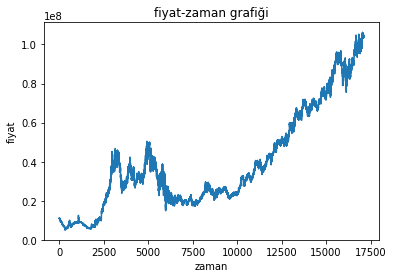

In [8]:
dataset = data.iloc[:,1:5].values
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape
plt.plot(dataset)
plt.xlabel("zaman")
plt.ylabel("fiyat")
plt.title("fiyat-zaman grafiği")
plt.show()

In [4]:
dataset.size

17116

In [5]:
# 0-1 sıkıştırma
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))
time_stemp = 10 #her 15 ünde 1 y_train verisi eklenecek 
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY) 

train size: 14548, test size: 2568 


In [6]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# lstm modeli

In [7]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
14537/14537 [==============================] - 117s 8ms/step - loss: 1.5401e-04
Epoch 2/15
14537/14537 [==============================] - 111s 8ms/step - loss: 5.8660e-05
Epoch 3/15
14537/14537 [==============================] - 111s 8ms/step - loss: 4.9988e-05
Epoch 4/15
14537/14537 [==============================] - 116s 8ms/step - loss: 4.4176e-05
Epoch 5/15
14537/14537 [==============================] - 115s 8ms/step - loss: 4.1323e-05
Epoch 6/15
14537/14537 [==============================] - 112s 8ms/step - loss: 3.9515e-05
Epoch 7/15
14537/14537 [==============================] - 113s 8ms/step - loss: 3.8887e-05
Epoch 8/15
14537/14537 [==============================] - 113s 8ms/step - loss: 3.6105e-05
Epoch 9/15
14537/14537 [==============================] - 111s 8ms/step - loss: 3.4750e-05
Epoch 10/15
14537/14537 [==============================] - 11

In [18]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "model1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# Load the Model back from file
Pkl_Filename = "model1.pkl"
with open(Pkl_Filename, 'rb') as file:  
    model = pickle.load(file)
model

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found array with dim 3. Estimator expected <= 2.

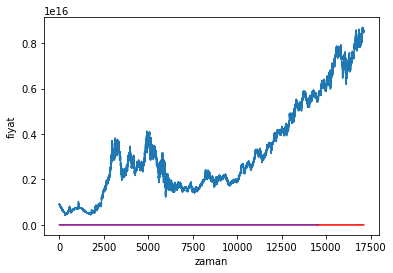

In [27]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,color="purple")
plt.plot(testPredictPlot,color="red")
plt.xlabel("zaman")
plt.ylabel("fiyat")
plt.show()

# forecasting


In [21]:
close_data = data['Close'].values
print(close_data.shape)
close_data = close_data.reshape((-1,1))
close = []
for i in range(len(close_data)-time_stemp-1):
    a = close_data[i:(i+time_stemp), 0]
    close.append(a)
close_data = np.array(close)
print(close_data.shape)
close_data = close_data.reshape((-1,1))
#close_data = numpy.reshape(close_data, (close_data.shape[0], 1,close_data.shape[1] ))
#close_data = close_data.reshape((-1))
print(close_data.shape)

(4279,)
(4263, 15)
(63945, 1)


In [22]:
look_back = time_stemp
def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]    
    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        #x= numpy.reshape(x, (x.shape[0], x.shape[1],look_back ))
        x = x.reshape((1,1, look_back))
        out = model.predict(x)[0][0]
        #out=scaler.inverse_transform(out)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]       
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = data['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [27]:
forecast

array([ 1.03889999e+08,  8.67419422e-01,  8.67419422e-01,  5.35206199e-02,
        5.35206199e-02, -7.34349549e-01])

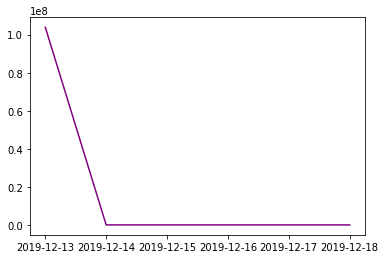

In [26]:
num_prediction = 5
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)
plt.plot(forecast_dates,forecast,color="purple")
#plt.plot(forecast,color="red")
plt.show()

# ikinci model

In [20]:
train_size2 = int(len(dataset) * 0.90)
test_size2 = len(dataset) - train_size2
train = dataset[0:train_size2,:]
test = dataset[train_size2:len(dataset),:]
train = train.astype(float)
test = train.astype(float)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.0739157 ],
       [0.0739157 ],
       [0.07208308],
       ...,
       [0.99266952],
       [0.9772755 ],
       [0.99047037]])

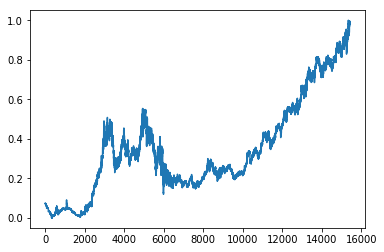

In [21]:
plt.plot(train_scaled)
plt.show()

In [22]:
X_train = []
y_train = []
timesteps = 30
for i in range(timesteps, 12689):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.0739157 ],
        [0.0739157 ],
        [0.07208308],
        ...,
        [0.06902871],
        [0.06597434],
        [0.06597434]],

       [[0.0739157 ],
        [0.07208308],
        [0.07208308],
        ...,
        [0.06597434],
        [0.06597434],
        [0.06536347]],

       [[0.07208308],
        [0.07208308],
        [0.07208308],
        ...,
        [0.06597434],
        [0.06536347],
        [0.06536347]],

       ...,

       [[0.55613928],
        [0.56371411],
        [0.55430666],
        ...,
        [0.5690898 ],
        [0.55882712],
        [0.57507636]],

       [[0.56371411],
        [0.55430666],
        [0.56212584],
        ...,
        [0.55882712],
        [0.57507636],
        [0.5584606 ]],

       [[0.55430666],
        [0.56212584],
        [0.56090409],
        ...,
        [0.57507636],
        [0.5584606 ],
        [0.5666463 ]]])

In [31]:
# model
model2 = Sequential()
model2.add(LSTM(10, input_shape = (X_train.shape[1], 1))) # 10 lstm neuron(block)
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train, y_train, epochs=3, batch_size=1)

Epoch 1/3
12659/12659 [==============================] - 882s 70ms/step - loss: 3.6395e-04
Epoch 2/3
12659/12659 [==============================] - 881s 70ms/step - loss: 8.0180e-05
Epoch 3/3
12659/12659 [==============================] - 889s 70ms/step - loss: 7.6984e-05


In [32]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "model2.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model2, file)

In [25]:
# Load the Model back from file
import pickle
Pkl_Filename = "model2.pkl"
with open(Pkl_Filename, 'rb') as file:  
    model2 = pickle.load(file)
model2

In [23]:
#test datasetim
real_stock_price = test
#test.shape
train=pd.DataFrame(train)
test=pd.DataFrame(test)
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train, test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs.size

15434

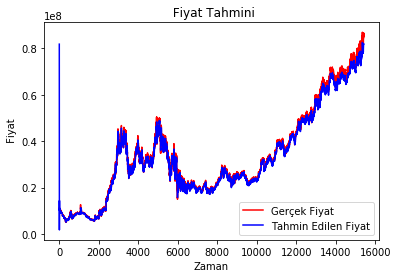

In [26]:
X_test = []
for i in range(timesteps, 15434):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model2.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Gerçek Fiyat')
plt.plot(predicted_stock_price, color = 'blue', label = 'Tahmin Edilen Fiyat')
plt.title(' Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel(' Fiyat')
plt.legend()
plt.show()